### Faustregeln:
1. Ist der DAX in einem Jahr bis Ende Oktober um 30 Prozent gefallen, kaufe Aktien!
2. Kaufe weder Aktienfonds noch Zertifikate
3. Aktienkäufe lohnen sich nur, wenn du insgemsamt mindestens 6000 Euro anlegst!
4. Kaufe nur Aktien, wenn du das Geld in den nächsten drei Jahren nicht brauchst!
5. Kaufe Aktien mit niedriger Bewertung und relativer Stärke!
6. Ist der DAX schon drei bis vier Jahre lang gestiegen, verkaufe!
7. Treibt die Zentralbank ihre Leitzinsen schon seit 12 Monaten nach oben, verkaufe!
8. Liest du in der Zeitung von Rekordgewinnen und Übernahmen, verkaufe!
9. Höre nicht auf Berater, auch nicht von deiner Bank!
10. Bedenke, dass die Mehrheitsmeinung bekannt und daher schon von gestern ist!

In [1]:
"""
 GUI erstellen, wenn man einen Titel anklickt öffnen sich die Schaubilder 
"""

'\n GUI erstellen, wenn man einen Titel anklickt öffnen sich die Schaubilder \n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web
import seaborn as sns
import matplotlib as mpl
import mplfinance as mpf
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] 
sns.set(font_scale=1.5)

In [3]:
def DailyReturnPercentage(stocks):
    for i in stocks:
        i['Return'] = i['Close'].pct_change(1)
    return
        
def SeeTrend(stocks):
    True_state = stocks['Return'].tail(n=5)[:-1]>0.0
    if True_state.all():
        a='5 Tage Zuwachs'
    elif sum(True_state==True)==4:
        a='4 Tage Zuwachs' 
    elif sum(True_state==True)==3:
        a='3 Tage Zuwachs'
    elif sum(True_state==True)==2:
        a='2 Tage Zuwachs'
    elif sum(True_state==True)==1:
        a='1 Tage Zuwachs'
    else:
        a='Bad'
    return a

def PerformanceFiveDays(stocks):
    for i in stocks:
        i['5 Tage Performance']=i['Return'].tail(n=5).sum()
    return

def PerformanceMonth(stocks):
    for i in stocks:
        i['Month Performance']=i['Return'].tail(n=27).sum()
    return
        
def FiveDaysDailyReturnTrend(stocks):
    for i in stocks:
        i['Trend'] = SeeTrend(i)
    return
        
def CumulativeReturn(stocks,norm_date):
    for i in stocks:
        #i['Cumulative Return']=(1+i['Return']).cumprod()
        i['Cumulative Return']=(i['Close'])/(i['Close'][norm_date])
    return
        
def CreateOpenValuesList(stocks):
    OpenValues=[]
    for i in stocks:
        OpenValues.append(i['Open'][-1:][-1])
    return OpenValues

def CreateReturnValuesList(stocks):
    ReturnValues=[]
    for i in stocks:
        ReturnValues.append(i['Return'][-1:][-1])
    return ReturnValues

def CreateCloseValuesList(stocks):
    CloseValues=[]
    for i in stocks:
        CloseValues.append(i['Close'][-1:][-1])
    return CloseValues

def CreateTrendValuesList(stocks):
    TrendValues=[]
    for i in stocks:
        TrendValues.append(i['Trend'][-1:][-1])
    return TrendValues

def CreateMonthValuesList(stocks):
    MonthValues=[]
    for i in stocks:
        MonthValues.append(i['Month Performance'][-1:][-1])
    return MonthValues

def CreatePerformanceValuesList(stocks):
    PerformanceValues=[]
    for i in stocks:
        PerformanceValues.append(i['5 Tage Performance'][-1:][-1])
    return PerformanceValues

def highlight_max(s):
    '''
    highlight the maximum in a Series green.
    '''
    is_max = s == s.max()
    return ['background-color: darkgreen' if v else '' for v in is_max]

def highlight_min(s):
    '''
    highlight the minimum in a Series red.
    '''
    is_min = s == s.min()
    return ['background-color: darkred' if v else '' for v in is_min]


def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, white otherwise.
    """
    color = 'red' if val < 0 else ''
    return 'color: %s' % color

def color_positive_green(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, white otherwise.
    """
    color = 'green' if val > 0 else ''
    return 'color: %s' % color

def bolinger_plot(stock):
    stock['Close: 200 Day Mean'] = stock['Close'].rolling(200).mean()
    # Upper = 20 MA + 2*std(20)
    stock['Upper'] = stock['Close: 200 Day Mean']+2*(stock['Close'].rolling(200).std())
    # Lower = 20 MA - 2*strd(20)
    stock['Lower'] = stock['Close: 200 Day Mean']-2*(stock['Close'].rolling(200).std())
    # Close
    stock[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])
    return

def DayMean50(stock):
    stock['Close: 50 Day Mean'] = stock['Close'].rolling(50).mean()
    return

def candlestick(stock):
    mpf.plot(stock['2020-03-01':],type='candle',mav=(3,10,14),volume=True,style='starsandstripes',figratio=(12,6))
    return
    
def CreatingTable(stocks,index):
    DailyReturnPercentage(stocks)
    FiveDaysDailyReturnTrend(stocks)
    PerformanceFiveDays(stocks)
    PerformanceMonth(stocks)
    CumulativeReturn(stocks,'2020-02-03')
    
    OpenValues        = CreateOpenValuesList(stocks)
    CloseValues       = CreateCloseValuesList(stocks)
    ReturnValues      = CreateReturnValuesList(stocks)
    TrendValues       = CreateTrendValuesList(stocks)
    PerformanceValues = CreatePerformanceValuesList(stocks)
    PerformanceMonthValues = CreateMonthValuesList(stocks)
    
    portfolio=pd.DataFrame({'Return':ReturnValues,'Open':OpenValues,'Close':CloseValues,'Trend':TrendValues,'5d Performance':PerformanceValues,'Month Performance':PerformanceMonthValues})
    portfolio.index = index
    
    portfolio = portfolio.style.\
        apply(highlight_max,subset=['Return','5d Performance','Month Performance']).\
        apply(highlight_min,subset=['Return','5d Performance','Month Performance']).\
       applymap(color_negative_red,subset=['Return','5d Performance','Month Performance']).\
        applymap(color_positive_green,subset=(['Return','5d Performance','Month Performance'])) 
    
    return portfolio

In [4]:
start = datetime.datetime(2018,11,2)
finish = datetime.datetime.now()

In [5]:
#Einzelwert
apple         = web.DataReader('AAPL','yahoo',start,finish)
ibm           = web.DataReader('IBM','yahoo',start,finish)
tmv           = web.DataReader('TMV.DE','yahoo',start,finish)
rwe           = web.DataReader('RWE.DE','yahoo',start,finish)
applied_mat   = web.DataReader('AMAT','yahoo',start,finish)
AMD           = web.DataReader('AMD','yahoo',start,finish)
tyson         = web.DataReader('TSN','yahoo',start,finish)
valero        = web.DataReader('VLO','yahoo',start,finish)
nvidia        = web.DataReader('NVDA','yahoo',start,finish)
target        = web.DataReader('TGT','yahoo',start,finish)
pan_amer_silv = web.DataReader('PAAS','yahoo',start,finish)
netflix       = web.DataReader('NFLX','yahoo',start,finish)
hypoport      = web.DataReader('HYQ.DE','yahoo',start,finish)
hellofresh    = web.DataReader('HFG.DE','yahoo',start,finish)
gilead        = web.DataReader('GILD','yahoo',start,finish)
draeger       = web.DataReader('DRW3.DE','yahoo',start,finish)
barrick_gold  = web.DataReader('GOLD','yahoo',start,finish)
dax           = web.DataReader('^GDAXI','yahoo',start,finish)
vix           = web.DataReader('^VIX','yahoo',start,finish)
banken_index  = web.DataReader('^STOXX','yahoo',start,finish)
dow_jones_utility = web.DataReader('^DJU','yahoo',start,finish)
nasdaq        = web.DataReader('^IXIC','yahoo',start,finish)

In [6]:
stocks = [AMD,apple,barrick_gold,draeger,
          gilead,hellofresh,hypoport,netflix,
          nvidia,pan_amer_silv,target,tmv,tyson,valero]
indizes = [dax,vix,banken_index,dow_jones_utility,nasdaq]

index_indices=['Dax','VIX','Banken Index','Dow Jones Utility','NASDAQ']


index_stocks = ['AMD','Apple','Barrick Gold','Draegerwerk','Gilead Science','Hellofresh','Hypoport',
                  'Netflix','Nvidia','Pan American Silver','Target','TeamViewer','Tyson Foods','Valero Energies']

portfolio = CreatingTable(stocks,index_stocks)
indices = CreatingTable(indizes,index_indices)

In [7]:
indices

,Return,Open,Close,Trend,5d Performance,Month Performance
Dax,-0.0016185,10896.3,11048,3 Tage Zuwachs,0.0559406,0.0395808
VIX,0.0550197,28.97,29.53,1 Tage Zuwachs,-0.0894935,-0.159487
Banken Index,-0.0103553,338.7,339.27,3 Tage Zuwachs,0.0386603,0.0270171
Dow Jones Utility,-0.00993974,760.36,754.02,2 Tage Zuwachs,-2.2647e-05,-0.0848076
NASDAQ,-0.00969523,9375.19,9284.88,3 Tage Zuwachs,0.038035,0.0906898


In [8]:
portfolio

,Return,Open,Close,Trend,5d Performance,Month Performance
AMD,-0.0308565,56.68,54.65,3 Tage Zuwachs,0.00335777,0.00763994
Apple,-0.00745545,318.66,316.85,2 Tage Zuwachs,0.0238634,0.102817
Barrick Gold,-0.0363303,26.96,26.26,2 Tage Zuwachs,-0.0302869,0.0841306
Draegerwerk,-0.00577203,69,68.9,1 Tage Zuwachs,-0.0252049,-0.157971
Gilead Science,-0.00527811,73.47,73.5,1 Tage Zuwachs,-0.0484512,-0.041721
Hellofresh,-0.00156081,38.08,38.38,2 Tage Zuwachs,-0.0346201,0.34969
Hypoport,-0.00266312,372,374.5,3 Tage Zuwachs,0.115075,0.188448
Netflix,-0.0255099,448.56,436.25,1 Tage Zuwachs,-0.0122336,0.0594608
Nvidia,-0.0217112,362.06,351.01,5 Tage Zuwachs,0.0911598,0.224215
Pan American Silver,-0.0252253,27.18,27.05,5 Tage Zuwachs,0.217938,0.35304


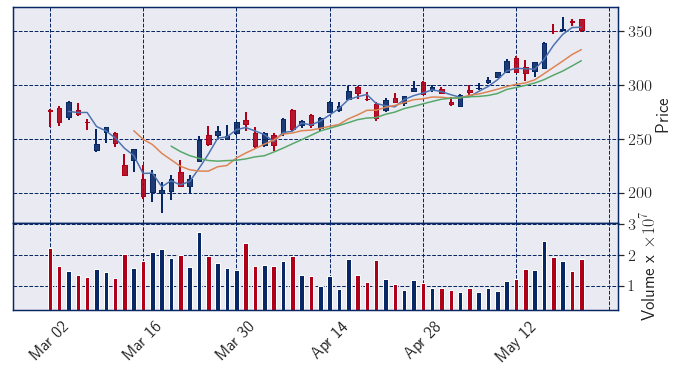

In [9]:
candlestick(nvidia)

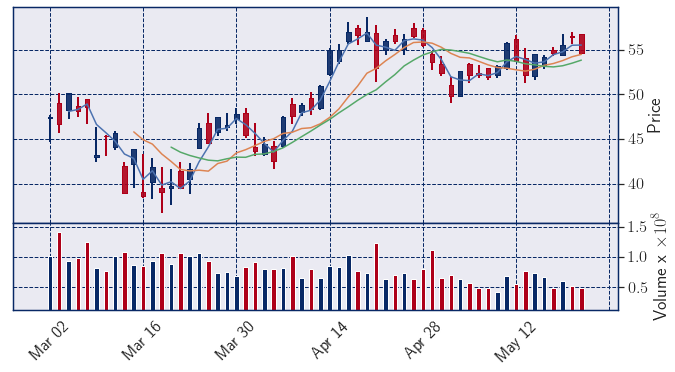

In [10]:
candlestick(AMD)

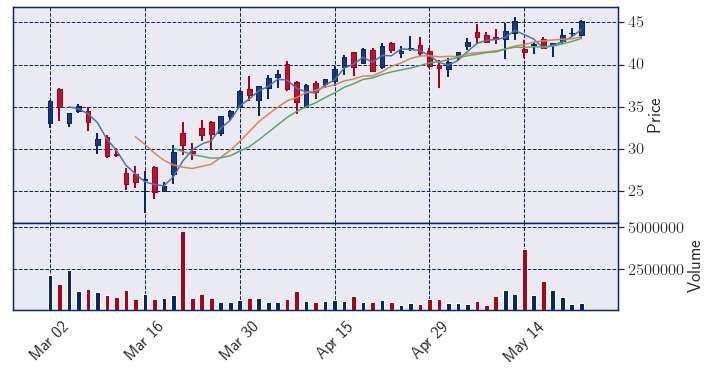

In [11]:
candlestick(tmv)

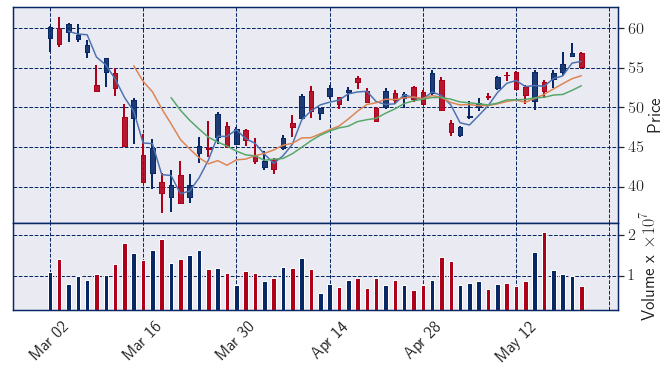

In [12]:
candlestick(applied_mat)

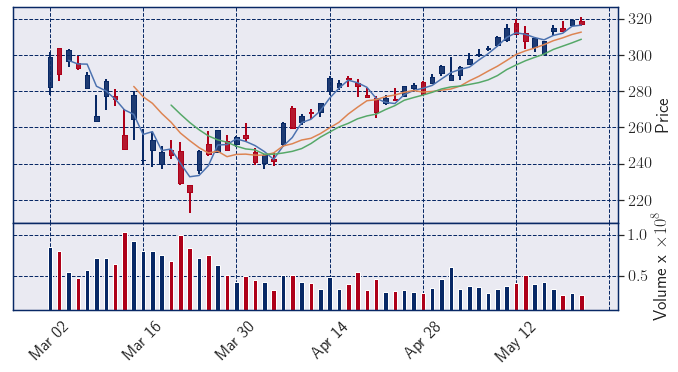

In [13]:
candlestick(apple)

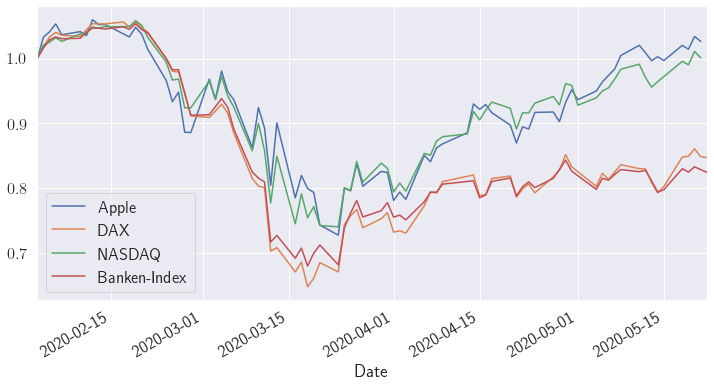

In [14]:
plt.figure(figsize=(12,6))
apple['Cumulative Return']['2020-02-03':].plot(label='Apple')
dax['Cumulative Return']['2020-02-03':].plot(label='DAX')
nasdaq['Cumulative Return']['2020-02-03':].plot(label='NASDAQ')
banken_index['Cumulative Return']['2020-02-03':].plot(label='Banken-Index')
plt.legend()

In [15]:
norm='2020-03-03'

In [16]:
apple['Return'][norm]

-0.0317592795151177

In [22]:
amd_nr = 24 
apple_nr = 14
barrick_gold_nr = 89
#securities_gold = 39
#db_platin = 59
draeger_nr = 36
gilead_nr = 12
hellofresh_nr = 45
hypoport_nr = 4
netflix_nr = 3
nvidia_nr = 10
pan_ameri_silv_nr = 100
target_nr = 4
teamviewer_nr = 45
tyson_food_nr = 16
valero_energy_nr = 19

nr_values = [24,14,89,36,12,45,4,3,10,100,4,45,16,19]

In [18]:
AMD['Anlage']=AMD['Close']*amd_nr

In [23]:
def Anlagewert(stocks,anzahl_values):
    
    for i,j in zip(stocks,anzahl_values):
        i['Anlage'] = i['Close']*j

In [24]:
Anlagewert(stocks,nr_values)

In [27]:
for i in stocksAMD['Anlage']+apple['Anlage']

Date
2018-11-02    3390.239929
2018-11-05    3299.859940
2018-11-06    3349.100067
2018-11-07    3463.459961
2018-11-08    3427.660095
                 ...     
2020-05-15    5608.739899
2020-05-18    5719.599884
2020-05-19    5715.240234
2020-05-20    5822.580139
2020-05-21    5747.500122
Name: Anlage, Length: 389, dtype: float64

In [43]:
depot = 0
for i in np.arange(0,len(stocks)):
    depot += stocks[i]['Anlage']
    

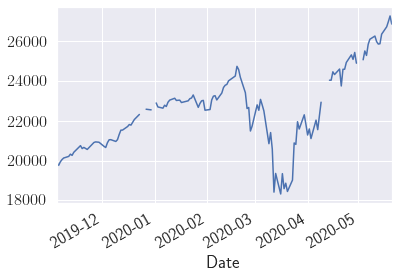

In [45]:
depot['2019-11-02':].plot()

In [46]:
depot

Date
2018-11-02             NaN
2018-11-05             NaN
2018-11-06             NaN
2018-11-07             NaN
2018-11-08             NaN
                  ...     
2020-05-15    26349.354897
2020-05-18    26719.415051
2020-05-19    26981.980291
2020-05-20    27264.974918
2020-05-21    26857.430277
Name: Anlage, Length: 389, dtype: float64